# Tratando dados

In [1]:
import pandas as pd
import numpy as np

A tabela contendo a relação entre PLFams e BRC ID está quebrada em duas partes. Unindo as tabelas:

In [2]:
sa_features = pd.read_csv('BVBRC_genome_feature1.csv')
saureus_features = pd.concat([sa_features, pd.read_csv('BVBRC_genome_feature2.csv')], axis=1)

In [3]:
saureus_ppi = pd.read_csv('PATRIC_interactions.csv')

In [26]:
saureus_ppi = saureus_ppi[['Interactor A ID', 'Interactor B ID']].astype("string")

In [27]:
saureus_ppi.head()

,Interactor A ID,Interactor B ID
0,fig|93061.5.peg.452,fig|93061.5.peg.713
1,fig|93061.5.peg.1920,fig|93061.5.peg.1921
2,fig|93061.5.peg.111,fig|93061.5.peg.119
3,fig|93061.5.peg.112,fig|93061.5.peg.121
4,fig|93061.5.peg.1069,fig|93061.5.peg.1071


In [20]:
plf = saureus_features[['BRC ID', 'PATRIC genus-specific families (PLfams)']].astype("string")

In [21]:
plf.head() #não sei pq fica duplicado

,BRC ID,BRC ID,PATRIC genus-specific families (PLfams),PATRIC genus-specific families (PLfams)
0,fig|1241616.6.peg.978,fig|1241616.6.peg.978,PLF_1279_00000947,PLF_1279_00000947
1,fig|1241616.6.peg.979,fig|1241616.6.peg.979,PLF_1279_00001869,PLF_1279_00001869
2,fig|1241616.6.peg.980,fig|1241616.6.peg.980,PLF_1279_00000303,PLF_1279_00000303
3,fig|1241616.6.peg.981,fig|1241616.6.peg.981,PLF_1279_00000735,PLF_1279_00000735
4,fig|1241616.6.peg.982,fig|1241616.6.peg.982,PLF_1279_00000362,PLF_1279_00000362


In [23]:
plf = plf.T.drop_duplicates().T 

In [24]:
plf.set_index('BRC ID', inplace = True)

In [25]:
plf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, fig|1241616.6.peg.978 to fig|93061.5.peg.942
Data columns (total 1 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   PATRIC genus-specific families (PLfams)  10999 non-null  string
dtypes: string(1)
memory usage: 171.9+ KB


In [11]:
sa_specialty = pd.read_csv('saureus_specialty_genes.csv')

In [12]:
sa_specialty_genes = sa_specialty[['BRC ID', 'Property']]

In [13]:
sa_specialty_genes.set_index('BRC ID', inplace = True)

Tenho:
- uma PPI primária (dados vindos do PATRIC, somente), interação em termos de PLFams
- PLFams indexados por BRC ID
- Specialty Genes indexados por BRC ID

In [14]:
sa_specialty_genes.head()

,Property
BRC ID,
fig|1413510.3.peg.2169,Antibiotic Resistance
fig|1241616.6.peg.421,Essential Gene
fig|1241616.6.peg.1194,Essential Gene
fig|1413510.3.peg.1709,Essential Gene
fig|93061.5.peg.1291,Virulence Factor


# iGraph

In [15]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
import igraph

In [18]:
from igraph import *
print(igraph.__version__)

0.9.11


In [37]:
mygraph = igraph.Graph.DataFrame(saureus_ppi, directed = False)

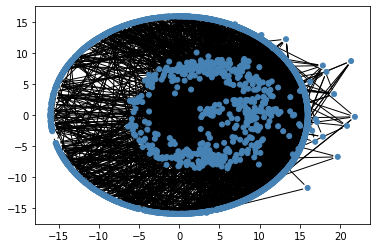

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot(mygraph, layout=layout, target=ax)